In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import autokeras as ak
from numpy import random
import time

In [6]:
model_theta23 = tf.keras.models.load_model('/home/ML4NO/ML_DUNE/Regression/models_PoissonTrain/0910_theta23_3_1_1.h5')
model_theta23.summary()
model_delta = tf.keras.models.load_model('/home/ML4NO/ML_DUNE/Regression/models_PoissonTrain/0910_delta_6_1_1.h5')
model_delta.summary()

Model: "Model_DNN_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
BatchNormalization (BatchNor (None, 264)               1056      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               135680    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
output (Dense)               (None, 1)                 1025      
Total params: 925,729
Trainable params: 925,201
Non-trainable params: 528
_________________________________________________________________
Model: "Model_DNN_regression"
_________________________________________________________________
Layer (t

In [7]:
data = np.load('/home/ML4NO/Data/sample_NuFit0911.npz')
data_mid = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])
data_IO_mid = data_mid[0]
data_NO_mid = data_mid[1]

In [8]:
N = 1000000
data_create_IO = random.poisson(data_IO_mid, size = (N, len(data_IO_mid)))
data_create_NO = random.poisson(data_NO_mid, size = (N, len(data_NO_mid)))

In [9]:
pre_create_IO_theta23 = model_theta23.predict(data_create_IO)
pre_create_NO_theta23 = model_theta23.predict(data_create_NO)
pre_create_IO_delta = model_delta.predict(data_create_IO)
pre_create_NO_delta = model_delta.predict(data_create_NO)

In [10]:
#總資料組數
N_DUNE = 92
N_T2HK = 36
N_DUT2 = 96

In [11]:
theta23_DUNE = []
delta_cp_DUNE = []
chi_DUNE = []
theta23_T2HK = []
delta_cp_T2HK = []
chi_T2HK = []
theta23_DUT2 = []
delta_cp_DUT2 = []
chi_DUT2 = []

In [12]:
#Import txt檔
f_DUNE = open("/home/ML4NO/Data/chi_square-4-2_figB_DUNE.txt")
for i in range(N_DUNE):
    s = f_DUNE.readline().split()
    array = []
    for j in range(len(s)) :
        array.append(float(s[j])) 
    theta23_DUNE.append(array[0])
    delta_cp_DUNE.append(array[1]) 
    chi_DUNE.append(array[2])
f_DUNE.close()
f_T2HK = open("/home/ML4NO/Data/chi_square-4-2_figB_T2HK.txt")
for i in range(N_T2HK):
    s = f_T2HK.readline().split()
    array = []
    for j in range(len(s)) :
        array.append(float(s[j])) 
    theta23_T2HK.append(array[0])
    delta_cp_T2HK.append(array[1]) 
    chi_T2HK.append(array[2])
f_T2HK.close()
f_DUT2 = open("/home/ML4NO/Data/chi_square-4-2_figB_DUT2.txt")
for i in range(N_DUT2):
    s = f_DUT2.readline().split()
    array = []
    for j in range(len(s)) :
        array.append(float(s[j])) 
    theta23_DUT2.append(array[0])
    delta_cp_DUT2.append(array[1]) 
    chi_DUT2.append(array[2])
f_DUT2.close()

In [13]:
theta23_DUNE = np.array(theta23_DUNE)
delta_cp_DUNE = np.array(delta_cp_DUNE)
chi_DUNE = np.array(chi_DUNE)
theta23_T2HK = np.array(theta23_T2HK)
delta_cp_T2HK = np.array(delta_cp_T2HK)
chi_T2HK = np.array(chi_T2HK)
theta23_DUT2 = np.array(theta23_DUT2)
delta_cp_DUT2 = np.array(delta_cp_DUT2)
chi_DUT2 = np.array(chi_DUT2)

In [14]:
x0 = np.linspace(min(theta23_DUNE)-3, max(theta23_DUNE)+3, 68)
y0 = np.linspace(min(delta_cp_DUNE)-6, max(delta_cp_DUNE)+6, 20)
X0, Y0 = np.meshgrid(x0, y0)
Z0 = np.zeros((len(X0),len(X0[0])))

for i in range(len(theta23_DUNE)):
    a = np.where(X0 == theta23_DUNE[i])[1][0]
    b = np.where(Y0 == delta_cp_DUNE[i])[0][0]
    Z0[b][a] = 1

x1 = np.linspace(min(theta23_T2HK)-3, max(theta23_T2HK)+3, 65)
y1 = np.linspace(min(delta_cp_T2HK)-6, max(delta_cp_T2HK)+6, 14)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = np.zeros((len(X1),len(X1[0])))

for i in range(len(theta23_T2HK)):
    a = np.where(X1 == theta23_T2HK[i])[1][0]
    b = np.where(Y1 == delta_cp_T2HK[i])[0][0]
    Z1[b][a] = 1

x2 = np.linspace(min(theta23_DUT2)-3, max(theta23_DUT2)+3, 129)
y2 = np.linspace(min(delta_cp_DUT2)-6, max(delta_cp_DUT2)+6, 25)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = np.zeros((len(X2),len(X2[0])))

for i in range(len(theta23_DUT2)):
    a = np.where(X2 == theta23_DUT2[i])[1][0]
    b = np.where(Y2 == delta_cp_DUT2[i])[0][0]
    Z2[b][a] = 1

In [15]:
IO_or_NO = 0 # 0 for IO and 1 for NO

if IO_or_NO == 0:
    input_theta23 = pre_create_IO_theta23
    input_delta = pre_create_IO_delta
else:
    input_theta23 = pre_create_NO_theta23
    input_delta = pre_create_NO_delta

bins_theta23 = x0
bins_delta = y0
likeliregion, xedges, yedges = np.histogram2d(input_theta23[:,0], input_delta[:,0], bins = [bins_theta23,bins_delta])
likeliregion = likeliregion.T

max_poi = np.where(likeliregion == likeliregion.max())
print("Maximum: theta23 {}, delta {} ".format(xedges[max_poi[1]],yedges[max_poi[0]]))
sorted_list = np.sort(likeliregion.reshape((len(xedges)-1)*(len(yedges)-1)))[::-1]

tot_event_num = sorted_list.sum()

onesigma = 0
for i in range(len(sorted_list)):
    onesigma += sorted_list[i]
    if onesigma/tot_event_num >= 0.68:
        one_sigma_num = sorted_list[i]
        break
        
twosigma = 0
for i in range(len(sorted_list)):
    twosigma += sorted_list[i]        
    if twosigma/tot_event_num >= 0.95:
        two_sigma_num = sorted_list[i]
        break

one_sigma_region = np.where(likeliregion < one_sigma_num, 0, likeliregion )
one_sigma_region_boundary = np.where(one_sigma_region > 0, 1, one_sigma_region )
one_sigma_allowed_region = np.where(one_sigma_region_boundary != 0)

two_sigma_region = np.where(likeliregion < two_sigma_num, 0, likeliregion )
two_sigma_region_boundary = np.where(two_sigma_region > 0, 1, two_sigma_region )
two_sigma_allowed_region = np.where(two_sigma_region_boundary != 0)

xaxis, yaxis = (xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2

Maximum: theta23 [49.1], delta [196.] 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


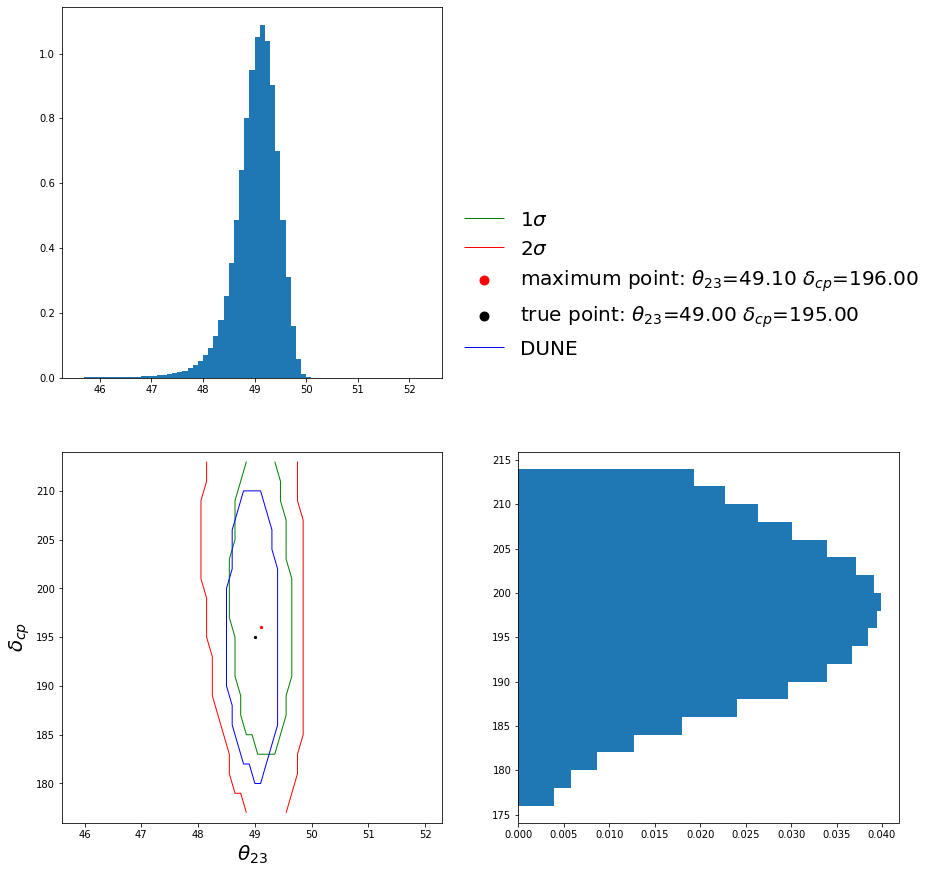

In [17]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
plot_axis = plt.subplot(2,2,1)
plot_axis.hist(pre_create_IO_theta23,density=1,bins=x0)

plot_axis = plt.subplot(2,2,4)

plot_axis.hist(pre_create_IO_delta,orientation="horizontal",density=1, bins=y0)

plot_axis = plt.subplot(2,2,3)
CS_1_sigma = plt.contour(xaxis, yaxis, one_sigma_region_boundary, 0, colors='green', linestyles="-", linewidths=1)
CS_2_sigma = plt.contour(xaxis, yaxis, two_sigma_region_boundary, 0, colors='red', linestyles="-", linewidths=1)
CS_1_sigma.collections[0].set_label("1$\sigma$")
CS_2_sigma.collections[0].set_label("2$\sigma$")
plot_axis.scatter(xedges[max_poi[1]],yedges[max_poi[0]], c="r", s=5, label = "maximum point: $\\theta_{23}$=%.2f $\delta_{cp}$=%.2f" %(xedges[max_poi[1]][0], yedges[max_poi[0]][0]))
if IO_or_NO == 0:plot_axis.scatter(data['theta23'][0], data['delta'][0], c="k", s=5, label = "true point: $\\theta_{23}$=%.2f $\delta_{cp}$=%.2f" %(data['theta23'][0], data['delta'][0]))
else:plot_axis.scatter(data['theta23'][1], data['delta'][1], c="k", s=5, label = "true point: $\\theta_{23}$=%.2f $\delta_{cp}$=%.2f" %(data['theta23'][1], data['delta'][1]))

DUT2 = plot_axis.contour(X0, Y0, Z0, 0, colors='blue', linestyles="-", linewidths=1)
DUT2.collections[0].set_label("DUNE")
plot_axis.set_xlabel(r'$\theta_{23} $', fontsize=20)
plot_axis.set_ylabel(r'$\delta_{cp} $', fontsize=20)
# plt.subplots_adjust(wspace=0.15, hspace=0.01)
plt.legend(bbox_to_anchor=(2.3, 1.7), ncol=1,fontsize=20, markerscale=4, edgecolor = "w",fancybox=False, framealpha=0)
plt.show()